In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sklearn.cluster as sk
from PIL import Image

In [12]:
img = cv2.cvtColor(cv2.imread('tree.jpg'), cv2.COLOR_BGR2RGB)
blur = cv2.blur(img,(5,5))
gblur = cv2.GaussianBlur(img,(3,3),0)
median = cv2.medianBlur(img,5)
bilin = cv2.bilateralFilter(img,9,75,75)

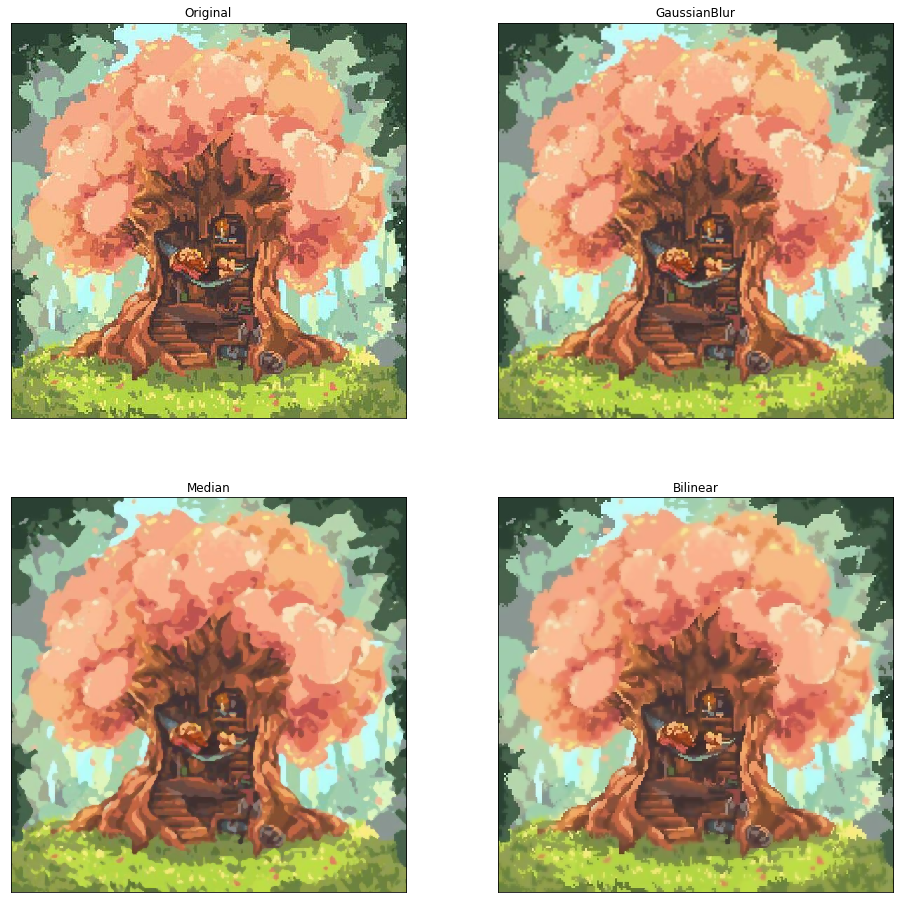

In [13]:
plt.figure(figsize=(16,16))
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(gblur),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(bilin),plt.title('Bilinear')
plt.xticks([]), plt.yticks([])
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x218085bf320>,
 Text(0.5, 1.0, 'Quantized'))

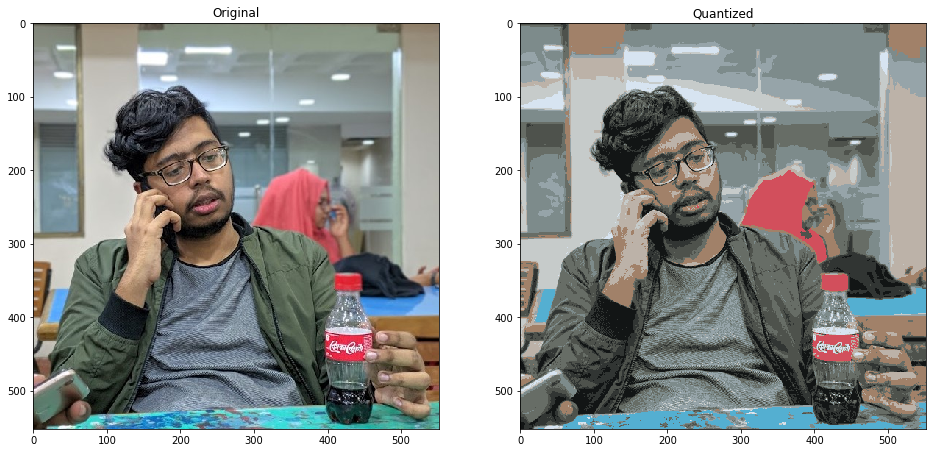

In [82]:
original = cv2.cvtColor(cv2.imread('images/abr.jpg'), cv2.COLOR_BGR2RGB)
n_colors = 12

arr = original.reshape((-1, 3))
kmeans = sk.MiniBatchKMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
less_colors = centers[labels].reshape(original.shape).astype('uint8')

plt.figure(figsize=(16,8))
plt.subplot(121),plt.imshow(original),plt.title('Original')
plt.subplot(122),plt.imshow(less_colors),plt.title('Quantized')

In [83]:
blur = cv2.blur(less_colors,(5,5))
gblur = cv2.GaussianBlur(less_colors,(7,7),0)
median = cv2.medianBlur(less_colors,5)
# bilin = cv2.bilateralFilter(less_colors,9,75,75)
downed = cv2.resize(median, dsize=(96, 96), interpolation=cv2.INTER_CUBIC)

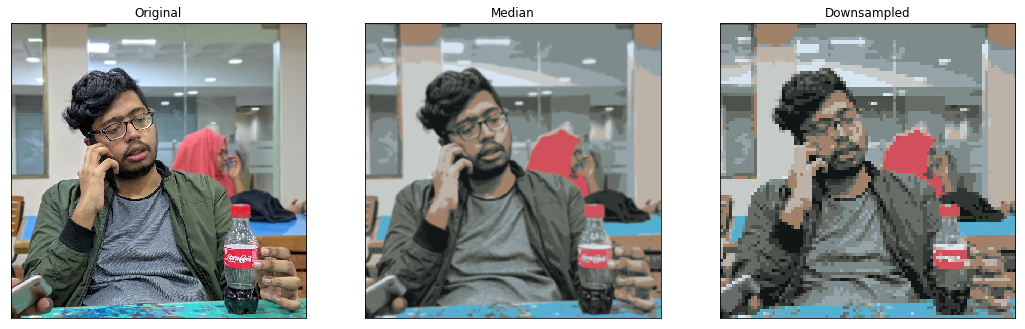

In [84]:
plt.figure(figsize=(18,8))
plt.subplot(131),plt.imshow(original),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gblur),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(downed),plt.title('Downsampled')
plt.xticks([]), plt.yticks([])
plt.show()